<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/5%EC%A3%BC%EC%B0%A8/classifier_iris_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

[붓꽃 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)의 품종을 분류하는 문제를 다양한 분류모델을 활용하여 해결해봅니다.

## Step0. 준비

### 데이터 로딩

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step1. 데이터 전처리

### EDA

In [2]:
# 데이터프레임의 요약 정보
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


- 데이터는 총 150개의 로우로 구성되어있으며, 컬럼은 5개가 존재한다.
- 각 컬럼의 결측치는 존재하지 않는다.

- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 너비
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 너비
- label : 품종

In [3]:
# 데이터프레임의 통계 정보 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# 품종(label) 카테고리 확인
iris_df['label'].unique()

array([0, 1, 2])

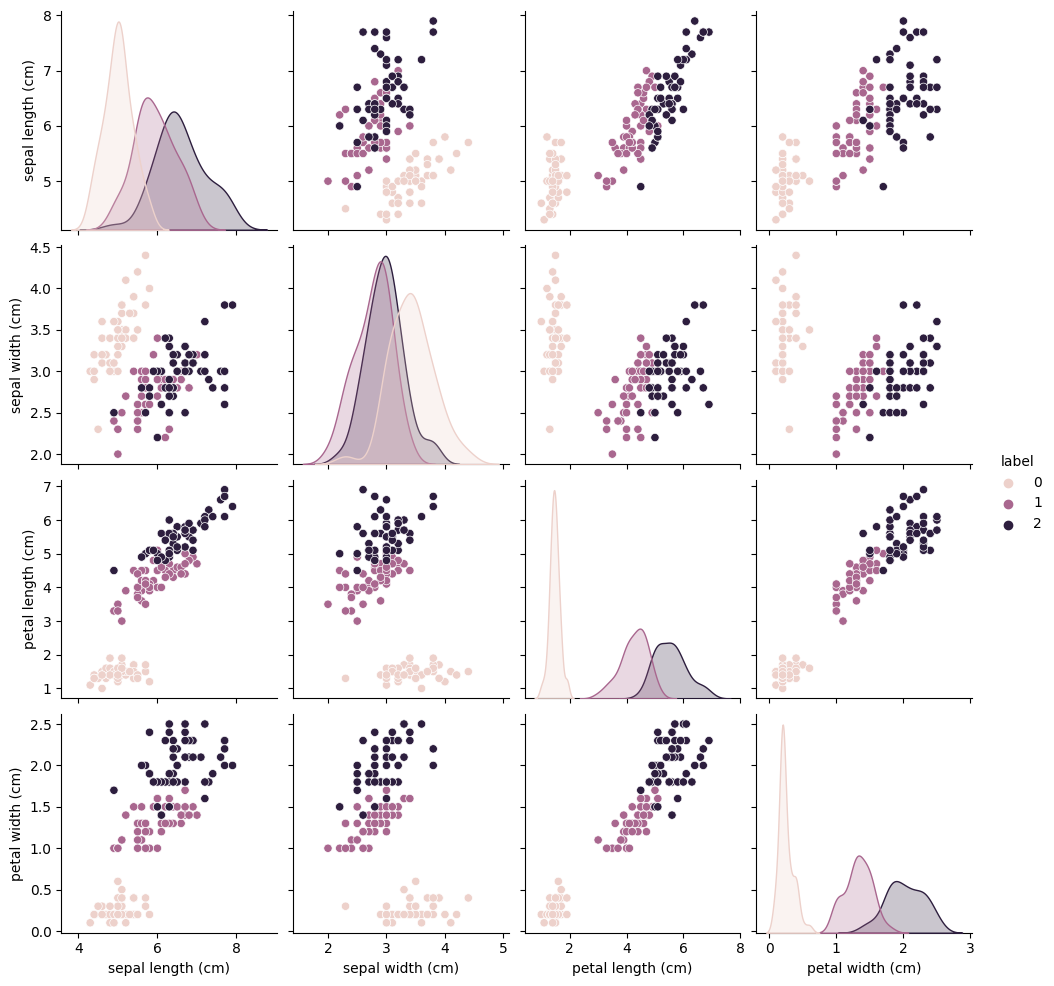

In [5]:
import seaborn as sns

# iris 데이터의 pairplot
sns.pairplot(iris_df, hue='label')

### 결측치처리
 - 결측치가 존재하지 않음으로 생략

In [6]:
# 결측치 확인
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 데이터분할

In [9]:
from sklearn.model_selection import train_test_split
X = iris_df.iloc[:, :4]
y = iris_df['label']


# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Step2. 학습

### DecisionTree

In [11]:
from sklearn.tree import DecisionTreeClassifier


# DecisionTreeClassifier 객체 생성 
tree_model= DecisionTreeClassifier(random_state=42)

# 학습용 데이터로 학습 수행
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Step3. 평가

In [13]:
#테스트용 데이터로 모델 평가
tree_score = tree_model.score(X_test, y_test)
tree_score

0.8947368421052632

## Step4. 적용

In [14]:
import numpy as np
data = np.array([
    [5.4, 4, 1.5, 0.2],
    [6.2 , 2.7, 5.1, 1.6],
    [6.5, 3.1 , 5.2, 2. ]
])

y_pred = tree_model.predict(data)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 2])

# 다양한 분류기

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

'''
코드를 작성해주세요
'''

### SVC

In [20]:
from sklearn.svm import SVC

svc_model = SVC()
# 학습용 데이터로 학습 수행
svc_model.fit(X_train, y_train)


#테스트용 데이터로 모델 평가
svc_model.score(X_test, y_test)

0.9210526315789473

### KNN(Nearest Neighbors)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
# 학습용 데이터로 학습 수행
knn_model.fit(X_train, y_train)


#테스트용 데이터로 모델 평가
knn_model.score(X_test, y_test)

0.9736842105263158